In [8]:
import os 
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.activations import softmax, relu, sigmoid
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.optimizers import RMSprop, Adam
import cv2
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mping
from keras import Sequential
from keras.applications.inception_v3 import InceptionV3
from keras import Model
from keras.callbacks import Callback

In [94]:
os.makedirs("../dataset/Brain Tumor Data Set/main_dataset", exist_ok=True)
os.makedirs("../dataset/Brain Tumor Data Set/main_dataset/Train", exist_ok=True)
os.makedirs("../dataset/Brain Tumor Data Set/main_dataset/Test", exist_ok=True)

train_dir = "../dataset/Brain Tumor Data Set/main_dataset/Train"
test_dir = "../dataset/Brain Tumor Data Set/main_dataset/Test"


In [95]:
tumor_data = "../dataset/Brain Tumor Data Set/Brain Tumor"
healthy = "../dataset/Brain Tumor Data Set/Healthy"

In [96]:
len(os.listdir(tumor_data))

2513

In [97]:
len(os.listdir(healthy))

2087

In [98]:
labels = os.listdir("../dataset/Brain Tumor Data Set/")
labels = labels[:2]
labels

['Brain Tumor', 'Healthy']

In [99]:
for i in labels:
    os.makedirs(train_dir+"/"+i, exist_ok=True)
    os.makedirs(test_dir+"/"+i, exist_ok=True)

In [100]:
train_label_path = {}
test_label_path = {}
for i in range(len(labels)):
    train_label_path[i] = os.path.join(train_dir, labels[i])
    test_label_path[i] = os.path.join(test_dir, labels[i])


In [101]:
train_label_path

{0: '../dataset/Brain Tumor Data Set/main_dataset/Train/Brain Tumor',
 1: '../dataset/Brain Tumor Data Set/main_dataset/Train/Healthy'}

In [102]:
test_label_path

{0: '../dataset/Brain Tumor Data Set/main_dataset/Test/Brain Tumor',
 1: '../dataset/Brain Tumor Data Set/main_dataset/Test/Healthy'}

In [103]:
tumor_image_path = [os.path.join(tumor_data, fname) for fname in os.listdir(tumor_data)]
healthy_image_path = [os.path.join(healthy, fname) for fname in os.listdir(healthy)]

healthy_image_path

['../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1).jpeg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1).png',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (10).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (100).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1000).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1001).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1002).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1003).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1004).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1005).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1006).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1007).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1008).jpg',
 '../dataset/Brain Tumor Data Set/Healthy/Not Cancer  (1009).jpg',
 '../d

In [104]:
train_tumor_images = random.sample(tumor_image_path, 1800)
train_healthy_images = random.sample(healthy_image_path, 1800)

test_tumor_images = [x for x in tumor_image_path if x not in train_tumor_images]
test_healthy_images = [x for x in healthy_image_path if x not in train_healthy_images]

In [105]:
for i in train_tumor_images:
    shutil.move(i, train_label_path[0]+"/"+i.split("/")[-1])

for i in train_healthy_images:
    shutil.move(i, train_label_path[1]+"/"+i.split("/")[-1])

In [106]:
# test_tumor_images = random.sample(tumor_image_path, abs(len(os.listdir(tumor_data))-1800))
# test_healthy_images = random.sample(healthy_image_path, abs(len(os.listdir(healthy))-1800))

In [108]:
for i in test_tumor_images:
    shutil.move(i, test_label_path[0]+"/"+i.split("/")[-1])

for i in test_healthy_images:
    shutil.move(i, test_label_path[1]+"/"+i.split("/")[-1])

In [ ]:
os.listdir("../dataset/Brain Tumor Data Set/Brain Tumor")

['Cancer (10).jpg',
 'Cancer (10).tif',
 'Cancer (1000).jpg',
 'Cancer (1007).jpg',
 'Cancer (101).jpg',
 'Cancer (1012).JPG',
 'Cancer (1039).JPG',
 'Cancer (1042).JPG',
 'Cancer (108).jpg',
 'Cancer (1086).JPG',
 'Cancer (1087).JPG',
 'Cancer (1091).JPG',
 'Cancer (1093).JPG',
 'Cancer (1115).jpg',
 'Cancer (112).jpg',
 'Cancer (1120).JPG',
 'Cancer (1125).jpg',
 'Cancer (1126).jpg',
 'Cancer (1017).jpg',
 'Cancer (1037).jpg',
 'Cancer (1051).jpg',
 'Cancer (1075).JPG',
 'Cancer (11).jpg',
 'Cancer (1114).jpg',
 'Cancer (1135).jpg',
 'Cancer (115).jpg',
 'Cancer (1183).JPG',
 'Cancer (1194).jpg',
 'Cancer (1206).jpg',
 'Cancer (1228).jpg',
 'Cancer (1242).jpg',
 'Cancer (1259).jpg',
 'Cancer (1283).jpg',
 'Cancer (1306).jpg',
 'Cancer (1328).jpg',
 'Cancer (1348).jpg',
 'Cancer (136).jpg',
 'Cancer (1381).jpg',
 'Cancer (14).tif',
 'Cancer (1419).jpg',
 'Cancer (1447).jpg',
 'Cancer (1461).jpg',
 'Cancer (1487).jpg',
 'Cancer (1501).jpg',
 'Cancer (1518).jpg',
 'Cancer (1550).jpg',
 

# Analysing the data

In [9]:
train_data = "../dataset/Brain Tumor Data Set/main_dataset/Train"
test_data = "../dataset/Brain Tumor Data Set/main_dataset/Test"

In [10]:
labels = os.listdir(train_data)
labels

['Brain Tumor', 'Healthy']

In [11]:
train_label_path = {}
test_label_path = {}
for i in range(len(labels)):
    train_label_path[i] = os.path.join(train_data, labels[i])
    test_label_path[i] = os.path.join(test_data, labels[i])


In [12]:
train_label_path

{0: '../dataset/Brain Tumor Data Set/main_dataset/Train/Brain Tumor',
 1: '../dataset/Brain Tumor Data Set/main_dataset/Train/Healthy'}

In [13]:
test_label_path

{0: '../dataset/Brain Tumor Data Set/main_dataset/Test/Brain Tumor',
 1: '../dataset/Brain Tumor Data Set/main_dataset/Test/Healthy'}

In [14]:
train_label_count = []
for i in train_label_path.values():
    train_label_count.append(len(os.listdir(i)))

train_label_count


[1800, 1800]

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

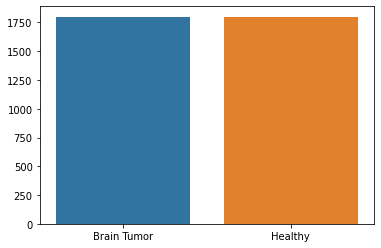

In [15]:
count = range(0, 1500)

sns.barplot(labels, train_label_count)

In [16]:
train_images = {}
test_images = {}

for i, j in train_label_path.items():
    train_images[i] = os.listdir(j)

for i, j in test_label_path.items():
    test_images[i] = os.listdir(j)

In [17]:
train_images

{0: ['Cancer (1).png',
  'Cancer (1).tif',
  'Cancer (10).jpg',
  'Cancer (100).jpg',
  'Cancer (1000).jpg',
  'Cancer (1001).jpg',
  'Cancer (1003).jpg',
  'Cancer (1005).jpg',
  'Cancer (1007).jpg',
  'Cancer (1008).jpg',
  'Cancer (101).jpg',
  'Cancer (1010).jpg',
  'Cancer (1011).jpg',
  'Cancer (1012).JPG',
  'Cancer (1014).jpg',
  'Cancer (1015).jpg',
  'Cancer (1017).jpg',
  'Cancer (1018).jpg',
  'Cancer (1019).jpg',
  'Cancer (1021).jpg',
  'Cancer (1022).jpg',
  'Cancer (1023).jpg',
  'Cancer (2112).jpg',
  'Cancer (2113).jpg',
  'Cancer (2114).jpg',
  'Cancer (2115).jpg',
  'Cancer (2116).jpg',
  'Cancer (2117).jpg',
  'Cancer (2118).jpg',
  'Cancer (2119).jpg',
  'Cancer (212).jpg',
  'Cancer (2120).jpg',
  'Cancer (2121).jpg',
  'Cancer (2122).jpg',
  'Cancer (2123).jpg',
  'Cancer (2125).jpg',
  'Cancer (2126).jpg',
  'Cancer (2127).jpg',
  'Cancer (2128).jpg',
  'Cancer (419).jpg',
  'Cancer (421).jpg',
  'Cancer (423).jpg',
  'Cancer (424).jpg',
  'Cancer (425).jpg',
 

In [18]:
train_image_path = {}
test_image_path = {}

for i, j in train_label_path.items():
    l = [os.path.join(j, fname) for fname in os.listdir(j)]
    train_image_path[i] = l


for i, j in test_label_path.items():
    l = [os.path.join(j, fname) for fname in os.listdir(j)]
    test_image_path[i] = l



In [19]:
def random_image_generate():
    random_image = []
    for i, j in train_image_path.items():
        rand_ = random.sample(j, 1)
        random_image.append(rand_)
    print(random_image)
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax[0, 0].imshow(cv2.imread(random_image[0][0]))
    ax[0, 0].set_title(random_image[0][0].split("/")[-2])

    ax[0, 1].imshow(cv2.imread(random_image[1][0]))
    ax[0, 1].set_title(random_image[1][0].split("/")[-2])

    plt.show()



[['../dataset/Brain Tumor Data Set/main_dataset/Train/Brain Tumor/Cancer (1854).jpg'], ['../dataset/Brain Tumor Data Set/main_dataset/Train/Healthy/Not Cancer  (1804).jpg']]


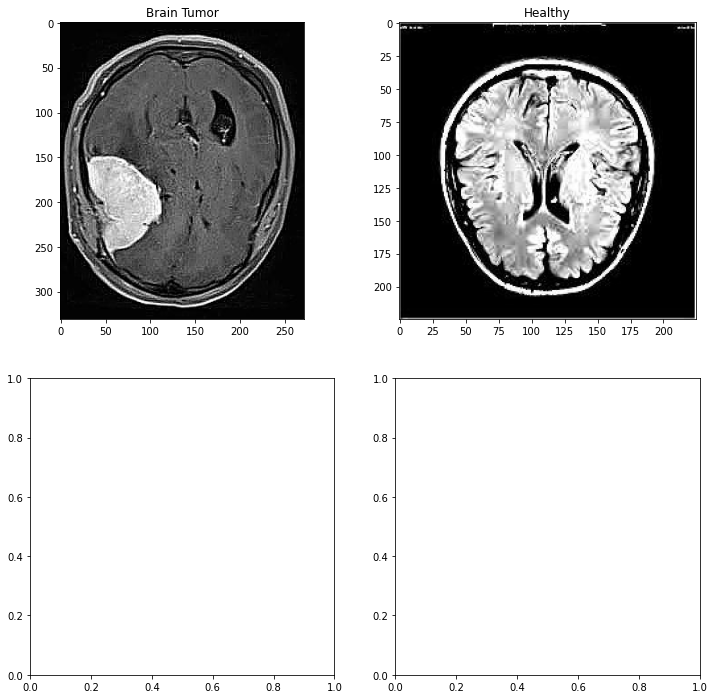

In [20]:
random_image_generate()

# Creating a model 

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255.0
)

test_datagen = ImageDataGenerator(
    rescale=1./255.0
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150, 150),
    class_mode="binary",
    color_mode="grayscale"
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(150, 150),
    class_mode="binary",
    color_mode="grayscale"
)


Found 3600 images belonging to 2 classes.
Found 1420 images belonging to 2 classes.


In [36]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_loss') < 0.15 and logs.get('loss') < 0.002:
      print("\nLoss is lower than 0.15 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [37]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(150, 150, 1), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation=relu))



model.add(Flatten())
model.add(Dense(512, activation=relu))  #128
model.add(Dense(128, activation=relu)) # 64
model.add(Dense(64, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.summary()

model.compile(
    loss=binary_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

history1 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[callbacks]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 128)     1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 flatten_3 (Flatten)         (None, 36992)            

In [13]:
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np

def predict(file_path):
    img = load_img(file_path, target_size=(150, 150), color_mode="grayscale")
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = loaded_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]<0.5:
        print("Cancer is detected")
    else:
        print("Cancer is not detected")

In [14]:
predict("/home/deborshi_roy/Downloads/ff1.png")

2022-08-09 20:56:03.490258: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


1/1 [==============================] - 2s 2s/step
[4.93049e-18]
Cancer is detected


In [32]:
labels

['Brain Tumor', 'Healthy']

In [38]:
model.save("../model/tumor_or_normal.h5")

In [5]:
from keras.models import load_model
model_l = load_model("../model/tumor_or_normal.h5")

2022-08-09 20:51:10.049995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 20:51:10.087742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 20:51:10.088034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 20:51:10.088398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
model_l.save_weights("../model/tumor_or_normal_weights.h5")

In [8]:
model_json = model_l.to_json()
with open("../model/tumor_or_normal.json", "w") as json_file:
    json_file.write(model_json)

In [10]:
from keras.models import model_from_json
json_file = open('../model/tumor_or_normal.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../model/tumor_or_normal_weights.h5")
print("Loaded model from disk")

Loaded model from disk
